In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

In [4]:
# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('datasets/Salary_dataset.csv')

# Display the first few rows of the dataset
df.head()

,Sl. No.,YearsExperience,Salary,PerformanceScore,Role
0,1,6,40000,6,Mid-Level Developer
1,2,19,75000,10,Senior Developer
2,3,14,65000,7,Senior Developer
3,4,10,55000,8,Mid-Level Developer
4,5,7,35000,9,Mid-Level Developer


In [5]:
# Check for missing values
df.isnull().sum()

Sl. No.             0
YearsExperience     0
Salary              0
PerformanceScore    0
Role                0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

# Remove duplicates if any
df = df.drop_duplicates()

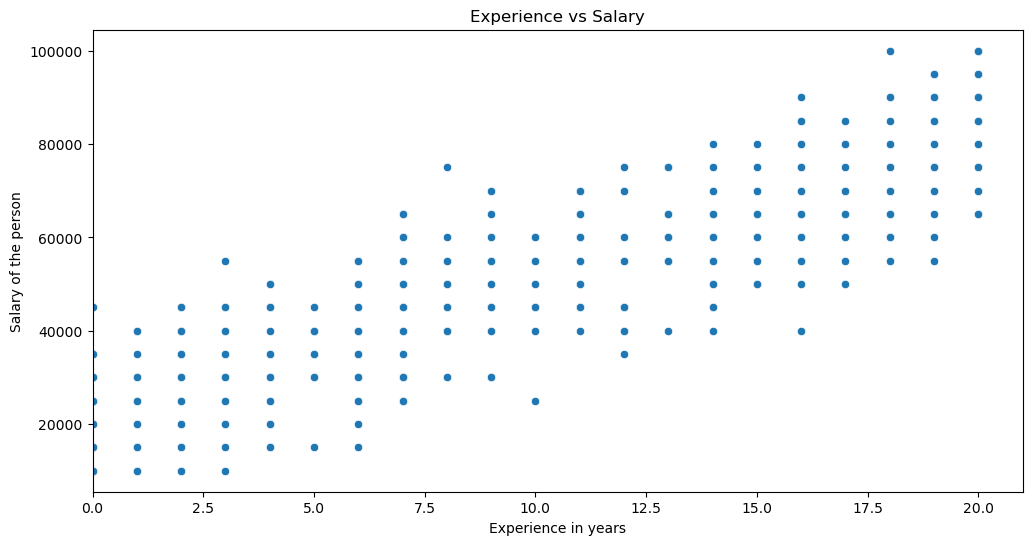

In [7]:
# Visualize the data
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='YearsExperience', y='Salary')

# Set x-axis limit to 0-20 years of experience
plt.xlim(0, 21)

plt.title('Experience vs Salary')
plt.xlabel('Experience in years')
plt.ylabel('Salary of the person')
plt.show()

In [10]:
# Separate target and features
X = df[['YearsExperience', 'PerformanceScore']]
y = df['Salary']

In [11]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict on test data
y_pred = model.predict(X_test)

In [17]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 102321887.85
R² Score: 0.7759
Mean Absolute Error: 8455.62
Root Mean Squared Error: 10115.43


Mean Squared Error: 102321887.85
Mean Absolute Error: 8455.62
R² Score: 0.7759
Root Mean Squared Error: 10115.43


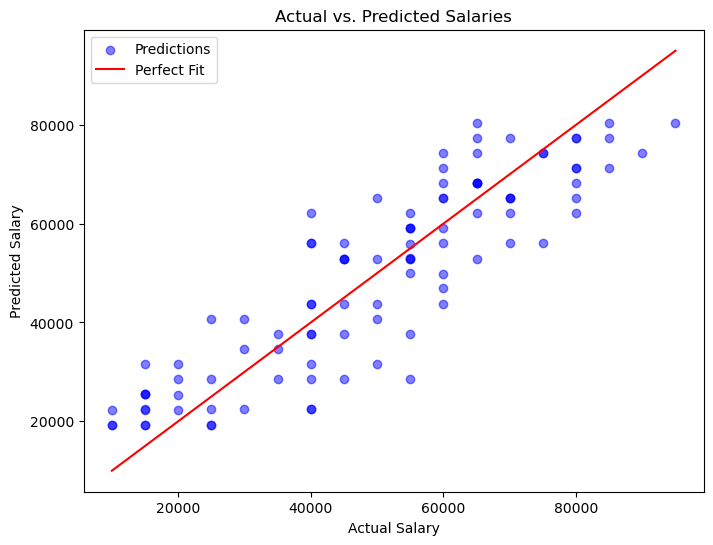

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Make Predictions on Test Data
y_pred = model.predict(X_test)

# 2. Evaluate Model Performance Again
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# 3. Plot Actual vs. Predicted Salaries
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="-", label="Perfect Fit")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salaries")
plt.legend()
plt.show()

In [19]:
# Calculate R² score for training data
train_r2 = r2_score(y_train, model.predict(X_train))

# Calculate R² score for test data
test_r2 = r2_score(y_test, model.predict(X_test))

print(f"R² Score on Training Data: {train_r2:.4f}")
print(f"R² Score on Test Data: {test_r2:.4f}")

# Check for underfitting
if train_r2 < 0.5 and test_r2 < 0.5:  # Both scores are low (threshold can be adjusted)
    print("⚠️ Potential underfitting detected! The model might be too simple.")
elif train_r2 > test_r2 + 0.1:  # Overfitting check
    print("⚠️ Potential overfitting detected!")
else:
    print("✅ Model seems to generalize well.")

R² Score on Training Data: 0.7990
R² Score on Test Data: 0.7759
✅ Model seems to generalize well.


In [116]:
# User se employee index input lena
emp_index = int(input("Enter Employee Index: "))

# Select the employee based on user input
new_employee = df.iloc[[emp_index]]

# Preprocessing (Feature Matching)
new_employee = new_employee.drop(columns=["Salary"], errors='ignore')
expected_features = X_train.columns
new_employee = new_employee.drop(columns=['Sl. No.'], errors='ignore')
new_employee = pd.get_dummies(new_employee, columns=['Role'], drop_first=True)
new_employee = new_employee.reindex(columns=expected_features, fill_value=0)

# Salary Prediction
predicted_salary = model.predict(new_employee)[0]
actual_salary = df.iloc[emp_index]["Salary"]
role =  df.iloc[emp_index]["Role"]
difference = predicted_salary - actual_salary  # Difference calculate karna

# Print Results
print(f"Role: {role}")
print(f"📊 Actual Salary: ₹{actual_salary:.2f}")
print(f"🤖 Predicted Salary: ₹{predicted_salary:.2f}")
print(f"🔹 Difference: ₹{difference:.2f}")

if difference > 0:
    print("✅ Salary increasing!")
elif difference < 0:
    print("❌ Salary decreasing!")
else:
    print("🔹 Salary Same Rahegi.")

Enter Employee Index:  43


Role: Senior Developer
📊 Actual Salary: ₹95000.00
🤖 Predicted Salary: ₹83085.58
🔹 Difference: ₹-11914.42
❌ Salary decreasing!


#Incresing employee number : 47 
decreasing employee number : 56